In [1]:
import sys
mainpath='c:/Kitti/Dropbox/PHD/Gridshells-EQCS' #location of folders
sys.path.insert(0, mainpath+'/Tekno') #location of python files

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import Tekno as tk
import Types as tp
import numpy as np
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import pandas as pd

# Parameters

In [3]:
Span   = 40  # m span of two-member structure
Height = 5   # m height at apex
gN     = 16  # number of triangles along each span  
nb     = 4   # number of finite elements along one beam
Span/Height

8.0

In [4]:
GRS = tp.GridShell(Span,Height,200,5,gN,nb)
tk.CreateGeom(GRS)
tk.EqProperties(GRS)
GRS.Lav

3.9311520318227888

In [5]:
n=5 # mm CHS cross-section diameter
DStart=100
DStep=150
m=3 # mm CHS cross-section thickness
tStart=10
tStep=15
print('D: ',np.arange(DStart,DStart+n*DStep,DStep))
print('t: ',np.arange(tStart,tStart+m*tStep,tStep))

D:  [100 250 400 550 700]
t:  [10 25 40]


# Load

In [7]:
with pd.HDFStore(mainpath+'/Saved results/NLin_Dt.h5') as store:
    CapacityF=store['CapacityF'].values
    Capacity=store['Capacity'].values
    Mmax=store['Mmax'].values
    Nmin=store['Nmin'].values
    Nmax=store['Nmax'].values
    Dmax=store['Dmax'].values
    rhoA=store['rhoA'].values
    DA=store['DA'].values
    tA=store['tA'].values
    CapacityF2=store['CapacityF2'].values
    Capacity2=store['Capacity2'].values
    Mmax2=store['Mmax2'].values
    Nmin2=store['Nmin2'].values
    Nmax2=store['Nmax2'].values
    Dmax2=store['Dmax2'].values

# Analysis

In [8]:
Fz = -2000.; #kN
MatNL = True

In [71]:
FFF

array([   24.70769437,    43.37223516,    48.67675312,   157.20611689,
         356.4288    ,   513.75324   ,   328.548675  ,   775.08368438,
        1171.36716185,   537.11385   ,  1314.27233437,  2500.        ,
         769.10718117,  1900.52772   ,  2918.22496875])

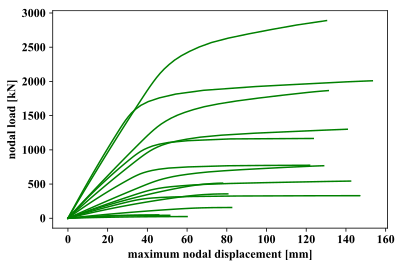

In [72]:
# oldalnyomasos
CapacityF=np.zeros(n*m)
Capacity=np.zeros(n*m)
Mmax=np.zeros(n*m)
Nmin=np.zeros(n*m)
Nmax=np.zeros(n*m)
Dmax=np.zeros(n*m)
rhoA=np.zeros(n*m)
DA=np.zeros(n*m)
tA=np.zeros(n*m)
for i in range(n):
    D=DStart+DStep*i
    for j in range(m):
        k=i*m+j
        DA[k]=D
        t=tStart+tStep*j
        tA[k]=t
        GRS = tp.GridShell(Span,Height,D,t,gN,nb)
        tk.CreateGeom(GRS)
        GRS.SupType=1 #oldalnyomasos
        GRS.MatNL=MatNL
        tk.BuildOpsModel(GRS)
        disp, force, ID, loadA, ok = tk.Analyze(GRS, -FFF[k]*1.1, 1, 0)
        if ok:
            CapacityF[k]=loadA[-1]  #kN
            Capacity[k]=loadA[-1]*GRS.nbnBns/GRS.span**2  #kN/m2
            rhoA[k]=tk.EqProperties(GRS)
            Dmax[k],Nmin[k],Nmax[k],Mmax[k],nminid, nmaxid, mid,_=tk.GetResults(disp, force);
            _ = plt.plot(disp[:,ID,2],loadA, 'g') # dot plot
plt.xlabel('maximum nodal displacement [mm]')
plt.ylabel('nodal load [kN]')
plt.show()

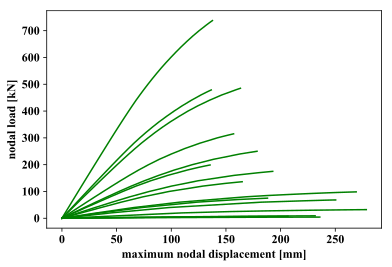

In [56]:
# oldalnyomasmentes
Fz = -1000.; #kN
GRS.Steps = 100
CapacityF2=np.zeros(n*m)
Capacity2=np.zeros(n*m)
Mmax2=np.zeros(n*m)
Nmin2=np.zeros(n*m)
Nmax2=np.zeros(n*m)
Dmax2=np.zeros(n*m)
for i in range(n):
    D=DStart+DStep*i
    for j in range(m):
        k=i*m+j
        t=tStart+tStep*j
        GRS = tp.GridShell(Span,Height,D,t,gN,nb)
        tk.CreateGeom(GRS)
        GRS.SupType=2 #oldalnyomasmentes
        GRS.MatNL=MatNL
        tk.BuildOpsModel(GRS)
        disp2, force2, ID2, loadA2, ok=tk.Analyze(GRS, Fz, 1, 0)
        if ok:
            CapacityF2[k]=loadA2[-1]  #kN
            Capacity2[k]=loadA2[-1]*GRS.nbnBns/GRS.span**2  #kN/m2
            Dmax2[k],Nmin2[k],Nmax2[k],Mmax2[k],nminid, nmaxid, mid,_=tk.GetResults(disp2, force2);
            _ = plt.plot(disp2[:,ID2,2],loadA2, 'g') # dot plot  
plt.xlabel('maximum nodal displacement [mm]')
plt.ylabel('nodal load [kN]')
plt.show()

# Results

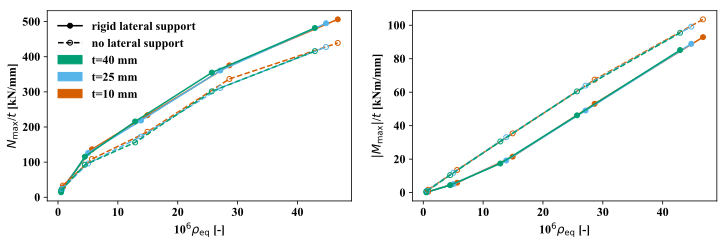

In [9]:
fig = plt.figure(figsize=(12, 3.5))
gs = gridspec.GridSpec(1, 2)
sms = 5
c1=[c/255. for c in [213., 94., 0.]] # vermillion
c2=[c/255. for c in [86, 180, 233]] # sky blue
c3=[c/255. for c in [0, 158, 115]] # bluish green

ax1 = plt.subplot(gs[0, 0])
plt.plot(rhoA[::3]*1e6,Nmax[::3]/10,'o-',c=c1, ms=sms) # oldalnyomasos t=5
plt.plot(rhoA[1::3]*1e6,Nmax[1::3]/25,'o-',c=c2, ms=sms) # oldalnyomasos t=10
plt.plot(rhoA[2::3]*1e6,Nmax[2::3]/40,'o-',c=c3, ms=sms) # oldalnyomasos t=15
plt.plot(rhoA[::3]*1e6,Nmax2[::3]/10,'o--',c=c1, ms=sms,fillStyle='none') # oldalnyomamentes t=5
plt.plot(rhoA[1::3]*1e6,Nmax2[1::3]/25,'o--',c=c2, ms=sms,fillStyle='none') # oldalnyomamentes t=10
plt.plot(rhoA[2::3]*1e6,Nmax2[2::3]/40,'o--',c=c3, ms=sms,fillStyle='none') # oldalnyomamentes t=15 
plt.xlabel('10$^6\\rho_{\\rm eq}$ [-]')
plt.ylabel('$N_{\\rm max}$/$t$ [kN/mm]')
#plt.xlim(0,12)

blue_patch = mpatches.Patch(color=c3, label='t=40 mm')
green_patch = mpatches.Patch(color=c1, label='t=10 mm')
red_patch = mpatches.Patch(color=c2, label='t=25 mm')
om_dot = mlines.Line2D([], [], color='k', marker='o',markersize=sms, label='no lateral support',linestyle='--',fillStyle='none')
o_dot = mlines.Line2D([], [], color='k', marker='o',markersize=sms, label='rigid lateral support',linestyle='-')
plt.legend(handles=[o_dot, om_dot,blue_patch,red_patch,green_patch],frameon=False,loc=2)

ax2 = plt.subplot(gs[0, 1]) 
plt.plot(rhoA[::3]*1e6,Mmax[::3]/10,'o-',c=c1, ms=sms) # oldalnyomasos t=5
plt.plot(rhoA[1::3]*1e6,Mmax[1::3]/25,'o-',c=c2, ms=sms) # oldalnyomasos t=10
plt.plot(rhoA[2::3]*1e6,Mmax[2::3]/40,'o-',c=c3, ms=sms) # oldalnyomasos t=15
plt.plot(rhoA[::3]*1e6,Mmax2[::3]/10,'o--',c=c1, ms=sms,fillStyle='none') # oldalnyomamentes t=5
plt.plot(rhoA[1::3]*1e6,Mmax2[1::3]/25,'o--',c=c2, ms=sms,fillStyle='none') # oldalnyomamentes t=10
plt.plot(rhoA[2::3]*1e6,Mmax2[2::3]/40,'o--',c=c3, ms=sms,fillStyle='none') # oldalnyomamentes t=15 
plt.xlabel('10$^6\\rho_{\\rm eq}$ [-]')
plt.ylabel('$|M_{\\rm max}|$/$t$ [kNm/mm]')
#plt.xlim(0,12)

plt.savefig('NLinT_NM.pdf', bbox_inches='tight')

plt.show()

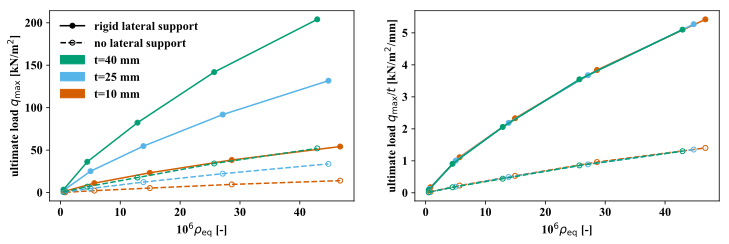

In [10]:
fig = plt.figure(figsize=(12, 3.5))
gs = gridspec.GridSpec(1, 2)
sms = 5
c1=[c/255. for c in [213., 94., 0.]] # vermillion
c2=[c/255. for c in [86, 180, 233]] # sky blue
c3=[c/255. for c in [0, 158, 115]] # bluish green

ax1 = plt.subplot(gs[0, 0])
plt.plot(rhoA[::3]*1e6,Capacity[::3],'o-',c=c1, ms=sms) # oldalnyomasos t=5
plt.plot(rhoA[1::3]*1e6,Capacity[1::3],'o-',c=c2, ms=sms) # oldalnyomasos t=10
plt.plot(rhoA[2::3]*1e6,Capacity[2::3],'o-',c=c3, ms=sms) # oldalnyomasos t=15
plt.plot(rhoA[::3]*1e6,Capacity2[::3],'o--',c=c1, ms=sms,fillStyle='none') # oldalnyomasmentes t=5
plt.plot(rhoA[1::3]*1e6,Capacity2[1::3],'o--',c=c2, ms=sms,fillStyle='none') # oldalnyomasmentes t=10
plt.plot(rhoA[2::3]*1e6,Capacity2[2::3],'o--',c=c3, ms=sms,fillStyle='none') # oldalnyomasmentes t=15
plt.xlabel('10$^6\\rho_{\\rm eq}$ [-]')
plt.ylabel('ultimate load $q_{\\rm max}$ [kN/m$^2$]')
#plt.xlim(0,12)

blue_patch = mpatches.Patch(color=c3, label='t=40 mm')
green_patch = mpatches.Patch(color=c1, label='t=10 mm')
red_patch = mpatches.Patch(color=c2, label='t=25 mm')
om_dot = mlines.Line2D([], [], color='k', marker='o',markersize=sms, label='no lateral support',linestyle='--',fillStyle='none')
o_dot = mlines.Line2D([], [], color='k', marker='o',markersize=sms, label='rigid lateral support',linestyle='-')
plt.legend(handles=[o_dot, om_dot,blue_patch,red_patch,green_patch],frameon=False,loc=2)

ax2 = plt.subplot(gs[0, 1])   
plt.plot(rhoA[::3]*1e6,Capacity[::3]/10,'o-',c=c1, ms=sms) # oldalnyomasos t=5
plt.plot(rhoA[1::3]*1e6,Capacity[1::3]/25,'o-',c=c2, ms=sms) # oldalnyomasos t=10
plt.plot(rhoA[2::3]*1e6,Capacity[2::3]/40,'o-',c=c3, ms=sms) # oldalnyomasos t=15
plt.plot(rhoA[::3]*1e6,Capacity2[::3]/10,'o--',c=c1, ms=sms,fillStyle='none') # oldalnyomasmentes t=5
plt.plot(rhoA[1::3]*1e6,Capacity2[1::3]/25,'o--',c=c2, ms=sms,fillStyle='none') # oldalnyomasmentes t=10
plt.plot(rhoA[2::3]*1e6,Capacity2[2::3]/40,'o--',c=c3, ms=sms,fillStyle='none') # oldalnyomasmentes t=15
plt.xlabel('10$^6\\rho_{\\rm eq}$ [-]')
plt.ylabel('ultimate load $q_{\\rm max}$/$t$ [kN/m$^2$/mm]')
#plt.xlim(0,12)

plt.savefig('NLinT.pdf', bbox_inches='tight')

plt.show()

# Save

In [90]:
A_df  = pd.DataFrame(CapacityF)
B_df  = pd.DataFrame(Capacity)
C_df  = pd.DataFrame(Mmax)
D_df  = pd.DataFrame(Nmin)
E_df  = pd.DataFrame(Nmax)
F_df  = pd.DataFrame(Dmax)
G_df  = pd.DataFrame(rhoA)
H_df  = pd.DataFrame(DA)
I_df  = pd.DataFrame(tA)
J_df  = pd.DataFrame(CapacityF2)
K_df  = pd.DataFrame(Capacity2)
L_df  = pd.DataFrame(Mmax2)
M_df  = pd.DataFrame(Nmin2)
N_df  = pd.DataFrame(Nmax2)
O_df  = pd.DataFrame(Dmax2)

with pd.HDFStore(mainpath+'/Saved results/NLin_Dt.h5') as store:
    store['CapacityF'] = A_df
    store['Capacity']= B_df
    store['Mmax'] = C_df
    store['Nmin']= D_df
    store['Nmax'] = E_df
    store['Dmax']= F_df
    store['rhoA'] = G_df
    store['DA']= H_df
    store['tA'] = I_df
    store['CapacityF2'] = J_df
    store['Capacity2']= K_df
    store['Mmax2'] = L_df
    store['Nmin2']= M_df
    store['Nmax2'] = N_df
    store['Dmax2']= O_df